            SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY    JUN    JUL  \
0  Gangetic West Bengal  1901  37.1  58.4   3.9   64.1  121.7  198.0  280.8   
1  Gangetic West Bengal  1902   0.0   1.2  44.2  103.8  161.6  140.9  347.8   
2  Gangetic West Bengal  1903  17.5  24.6  37.3   30.6   78.5  201.7  179.6   
3  Gangetic West Bengal  1904   0.1  23.9  35.6   17.5  160.2  286.7  435.3   
4  Gangetic West Bengal  1905  30.9  49.6  84.7   84.9  156.8   70.9  525.5   

     AUG    SEP    OCT   NOV  DEC  ANNUAL  
0  275.7  313.5   51.1  83.4  0.0  1487.7  
1  264.8  230.5   32.5  10.4  9.9  1347.6  
2  277.6  300.7  198.0   8.2  0.0  1354.3  
3  241.7  142.8   35.1   4.1  0.1  1383.1  
4  263.6  287.6  107.3   0.0  5.2  1667.0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  117 non-null    object 
 1   YEAR     

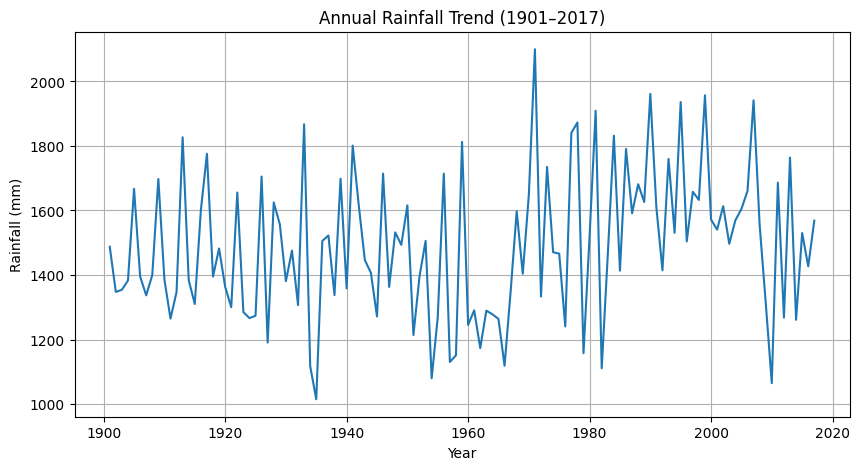

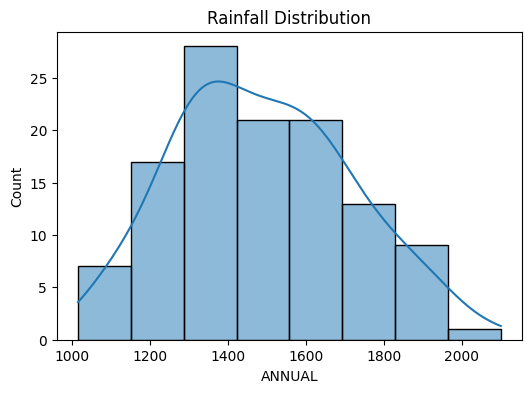


Model: Linear Regression
MAE  : 151.05
RMSE : 212.44
R^2  : -0.044

Model: Ridge Regression
MAE  : 151.05
RMSE : 212.44
R^2  : -0.044

Model: Decision Tree
MAE  : 184.28
RMSE : 235.30
R^2  : -0.281

Model: Random Forest
MAE  : 174.16
RMSE : 227.69
R^2  : -0.200

Model: Gradient Boosting
MAE  : 227.94
RMSE : 272.78
R^2  : -0.722

Model: Support Vector Regression
MAE  : 152.43
RMSE : 214.67
R^2  : -0.067

Overall Model Comparison:

                       Model         MAE        RMSE  R2 Score
0          Linear Regression  151.050145  212.438515 -0.044500
1           Ridge Regression  151.050088  212.438482 -0.044499
2              Decision Tree  184.278125  235.298165 -0.281383
3              Random Forest  174.159917  227.686136 -0.199817
4          Gradient Boosting  227.940855  272.777902 -0.722107
5  Support Vector Regression  152.434202  214.673855 -0.066596


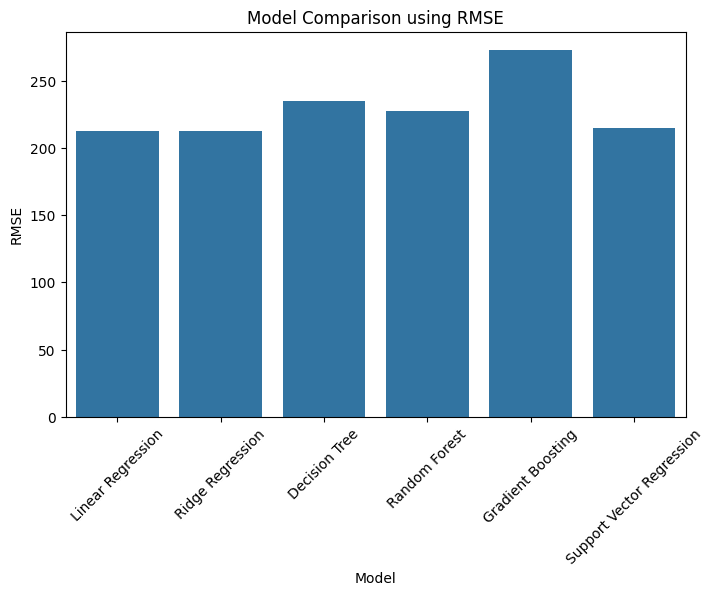

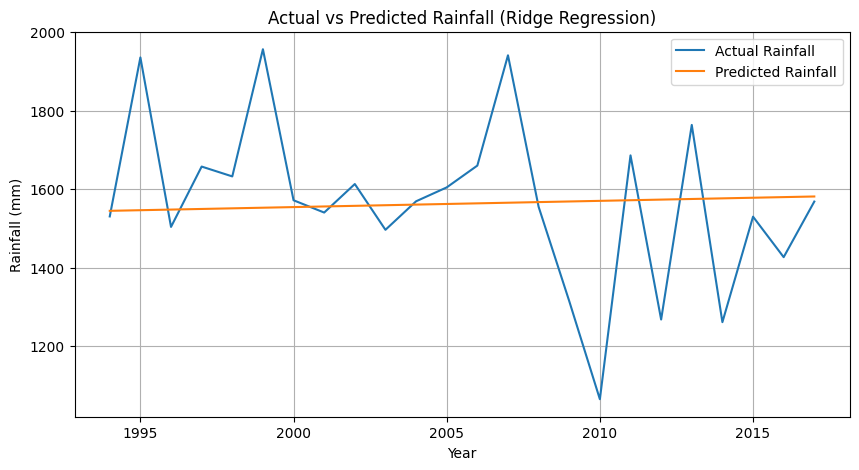

In [ ]:
# Rainfall Forecasting using Multiple Machine Learning Models
# Dataset: Rainfall data from 1901 to 2017
# Author: Example Academic ML Pipeline

# -----------------------------
# 1. Import Required Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Added os module for file path checking

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# 2. Load Dataset
# -----------------------------
# Update the path if required
file_path = "Rainfall_Data_LL.csv"

# Check if the file exists before attempting to read
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the dataset is uploaded to the Colab environment or the path is correct.")
    # Exit the script to prevent further errors from missing 'df'
    raise SystemExit("Exiting due to missing dataset file.")

# Read CSV file
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# -----------------------------
# 3. Basic Data Exploration
# -----------------------------
print("\nDataset Info:\n")
print(df.info())

print("\nStatistical Summary:\n")
print(df.describe())

# -----------------------------
# 4. Data Preprocessing
# -----------------------------
# Assumption:
# - 'YEAR' is the time variable
# - 'RAINFALL' is the target variable

# Handle missing values (if any)
df = df.fillna(df.mean(numeric_only=True))

# Sort data by year (important for time-series like data)
df = df.sort_values(by='YEAR')

# Features (X) and Target (y)
X = df[['YEAR']]
y = df['ANNUAL'] # Changed 'RAINFALL' to 'ANNUAL' as per dataset columns

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# -----------------------------
# 5. Data Visualization
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(df['YEAR'], df['ANNUAL']) # Changed 'RAINFALL' to 'ANNUAL'
plt.title('Annual Rainfall Trend (1901–2017)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

# Distribution of rainfall
plt.figure(figsize=(6, 4))
sns.histplot(df['ANNUAL'], kde=True) # Changed 'RAINFALL' to 'ANNUAL'
plt.title('Rainfall Distribution')
plt.show()

# -----------------------------
# 6. Model Definitions
# -----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf', C=100, gamma=0.1))
    ])
}

# -----------------------------
# 7. Model Training & Evaluation
# -----------------------------
results = []

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

    print(f"\nModel: {name}")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R^2  : {r2:.3f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2 Score'])
print("\nOverall Model Comparison:\n")
print(results_df)

# -----------------------------
# 8. Model Comparison Visualization
# -----------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.xticks(rotation=45)
plt.title('Model Comparison using RMSE')
plt.show()

# -----------------------------
# 9. Best Model Prediction Plot
# -----------------------------
# Select best model based on lowest RMSE
best_model_name = results_df.sort_values('RMSE').iloc[0]['Model']
best_model = models[best_model_name]

# Predict rainfall for test years
y_best_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(X_test['YEAR'], y_test.values, label='Actual Rainfall')
plt.plot(X_test['YEAR'], y_best_pred, label='Predicted Rainfall')
plt.title(f'Actual vs Predicted Rainfall ({best_model_name})')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# End of Code
# -----------------------------


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')